# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
clean_output_data_file = "../output_data/clean_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['touros',
 'lorengau',
 'jamestown',
 'ahipara',
 'inhambane',
 'rikitea',
 'bauchi',
 'voyvozh',
 'avarua',
 'mar del plata',
 'kruisfontein',
 'ancud',
 'altamont',
 'punta arenas',
 'atuona',
 'jacareacanga',
 'new norfolk',
 'tasiilaq',
 'albany',
 'port alfred',
 'bethel',
 'marakkanam',
 'ushuaia',
 'kodiak',
 'caravelas',
 'port blair',
 'mataura',
 'atikokan',
 'illoqqortoormiut',
 'taolanaro',
 'vrangel',
 'upernavik',
 'yellowknife',
 'torbay',
 'carnarvon',
 'mundra',
 'alcantara',
 'chulym',
 'cabo san lucas',
 'lavrentiya',
 'sokoni',
 'olafsvik',
 'esperance',
 'qaanaaq',
 'beringovskiy',
 'northam',
 'seoul',
 'severo-kurilsk',
 'clyde river',
 'rolim de moura',
 'hamilton',
 'thompson',
 'belaya gora',
 'mys shmidta',
 'loknya',
 'khatanga',
 'malinovoye ozero',
 'morant bay',
 'raudeberg',
 'lebu',
 'dikson',
 'bose',
 'sao joao da barra',
 'bredasdorp',
 'lazarev',
 'cape town',
 'belmonte',
 'umzimvubu',
 'nabire',
 'andra',
 'urucara',
 'maryborough',
 'bambous vir

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "busselton"

# # Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
print(query_url)

output = requests.get(query_url).json()

output

#cities


http://api.openweathermap.org/data/2.5/weather?appid=49095c030c922ca185d30b36412f4aaf&units=imperial&q=busselton


{'coord': {'lon': 115.33, 'lat': -33.65},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 51.62,
  'feels_like': 47.3,
  'temp_min': 51.01,
  'temp_max': 52,
  'pressure': 1009,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 109, 'gust': 8.99},
 'rain': {'1h': 0.14},
 'clouds': {'all': 20},
 'dt': 1596423973,
 'sys': {'type': 3,
  'id': 2020551,
  'country': 'AU',
  'sunrise': 1596409735,
  'sunset': 1596447644},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

In [4]:

city_name = []
country = []
lat = []
long = []
temp = []
temp_min = []
temp_max = []
humidity = []
cloud = []
wind = []
date = []

count = 0

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
#for city in ["new york"]:
    
    count = count + 1
    
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    #print(query_url)

    try:
        output = requests.get(query_url).json()
        
        # Check the temperature first. If the retrieval was bad, it will keep all the others the same length
        temp.append(output["main"]["temp"])
        temp_min.append(output["main"]["temp_min"])
        temp_max.append(output["main"]["temp_max"])
        humidity.append(output["main"]["humidity"])
        cloud.append(output["clouds"]["all"])
        wind.append(output["wind"]["speed"])
        date.append(output["dt"])
        
        lat.append(output["coord"]["lat"])
        long.append(output["coord"]["lon"])
        country.append(output["sys"]["country"])
        city_name.append(city)

        print(f"Processing Record {count} of Set 1 | {city}")
        
    except:
        print("City not found. Skipping...")
              
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | lorengau
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | inhambane
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bauchi
Processing Record 8 of Set 1 | voyvozh
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | altamont
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | jacareacanga
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | marakkanam
Processing Record 23 of Set 1 | ushuaia
Pro

Processing Record 202 of Set 1 | bodaybo
Processing Record 203 of Set 1 | wynyard
Processing Record 204 of Set 1 | poya
Processing Record 205 of Set 1 | carson city
Processing Record 206 of Set 1 | quchan
Processing Record 207 of Set 1 | najran
Processing Record 208 of Set 1 | behbahan
Processing Record 209 of Set 1 | imeni poliny osipenko
Processing Record 210 of Set 1 | cherskiy
Processing Record 211 of Set 1 | crystal beach
Processing Record 212 of Set 1 | tura
Processing Record 213 of Set 1 | pangkalanbuun
Processing Record 214 of Set 1 | kintinku
Processing Record 215 of Set 1 | leningradskiy
Processing Record 216 of Set 1 | atar
Processing Record 217 of Set 1 | walvis bay
Processing Record 218 of Set 1 | nanzhang
City not found. Skipping...
Processing Record 220 of Set 1 | aksu
Processing Record 221 of Set 1 | bilma
Processing Record 222 of Set 1 | mirnyy
Processing Record 223 of Set 1 | klaksvik
Processing Record 224 of Set 1 | talnakh
Processing Record 225 of Set 1 | provideniy

Processing Record 403 of Set 1 | ericeira
Processing Record 404 of Set 1 | acajutla
Processing Record 405 of Set 1 | richards bay
Processing Record 406 of Set 1 | golpayegan
Processing Record 407 of Set 1 | huarmey
Processing Record 408 of Set 1 | sierpc
Processing Record 409 of Set 1 | yinchuan
Processing Record 410 of Set 1 | holiday
City not found. Skipping...
Processing Record 412 of Set 1 | paipa
Processing Record 413 of Set 1 | margate
Processing Record 414 of Set 1 | blagoyevo
Processing Record 415 of Set 1 | port augusta
Processing Record 416 of Set 1 | pingzhuang
Processing Record 417 of Set 1 | harper
Processing Record 418 of Set 1 | rong kwang
Processing Record 419 of Set 1 | nedjo
City not found. Skipping...
Processing Record 421 of Set 1 | sinnamary
Processing Record 422 of Set 1 | batticaloa
Processing Record 423 of Set 1 | portland
Processing Record 424 of Set 1 | henderson
Processing Record 425 of Set 1 | ponta delgada
Processing Record 426 of Set 1 | lodingen
Processin

Processing Record 604 of Set 1 | barra patuca
Processing Record 605 of Set 1 | west wendover
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# create a dictionary to contain all the list variables

list_of_lat = [float(item) for item in lat]
list_of_long = [float(item) for item in long]
list_of_temp = [float(item) for item in temp]
list_of_temp_min = [float(item) for item in temp_min]
list_of_temp_max = [float(item) for item in temp_max]
list_of_humid = [float(item) for item in humidity]
list_of_cloud = [float(item) for item in cloud]
list_of_wind = [float(item) for item in wind]

weather_dict = {
    "City": city_name,
    "Country": country,    
    "Latitude": list_of_lat,
    "Longitude": list_of_long,
    "Temperature (F)": list_of_temp,
    "Min Temperature (F)": list_of_temp_min,
    "Max Temperature (F)": list_of_temp_max,
    "Humidity (%)": list_of_humid,
    "Cloudiness (%)": list_of_cloud,
    "Wind (MPH)": list_of_wind
}

# convert the dictionary into a dataframe
weather_data_df = pd.DataFrame(weather_dict)

weather_data_df.to_csv(output_data_file)
weather_data_df.head()


,City,Country,Latitude,Longitude,Temperature (F),Min Temperature (F),Max Temperature (F),Humidity (%),Cloudiness (%),Wind (MPH)
0,touros,BR,-5.20,-35.46,71.60,71.60,71.60,88.0,12.0,5.82
1,lorengau,PG,-2.02,147.27,83.80,83.80,83.80,78.0,87.0,11.99
2,jamestown,US,42.10,-79.24,65.57,64.40,66.00,93.0,90.0,12.75
3,ahipara,NZ,-35.17,173.17,62.55,62.55,62.55,69.0,12.0,7.96
4,inhambane,MZ,-23.86,35.38,67.39,67.39,67.39,70.0,100.0,7.11


In [40]:
weather_data_df.shape

(553, 10)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
# Get the indices of cities that have humidity over 100%.
humidity_outliers_df = weather_data_df[weather_data_df["Humidity (%)"] > 100]
humidity_outliers_df.index.values

array([], dtype=int64)

In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.drop(humidity_outliers_df.index.values, inplace=False)
clean_city_data_df

weather_data_df.shape
clean_city_data_df.shape

# Export the City_Data into a csv
clean_city_data_df.to_csv(clean_output_data_file)

In [43]:
# Extract relevant fields from the data frame




## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [104]:
# compute for the current date and convert into mm/dd/yy format
from datetime import date

today = date.today()
analysis_date = today.strftime("%B %d, %Y")
print("Analysis Date is ", analysis_date)

Analysis Date is  August 02, 2020


## Latitude vs. Temperature Plot

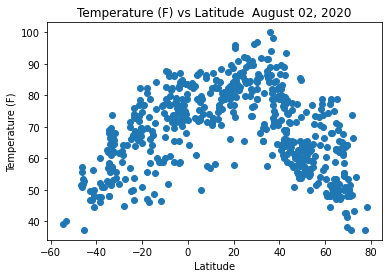

In [105]:
title = "Temperature (F) vs Latitude"
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Temperature (F)"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"{title}  {analysis_date}")

plt.savefig(f"../output_data/{title}.png")

## Latitude vs. Humidity Plot

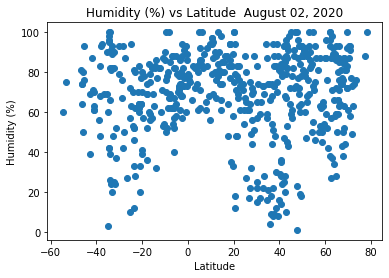

In [106]:
title = "Humidity (%) vs Latitude"

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity (%)"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"{title}  {analysis_date}")

plt.savefig(f"../output_data/{title}.png")

## Latitude vs. Cloudiness Plot

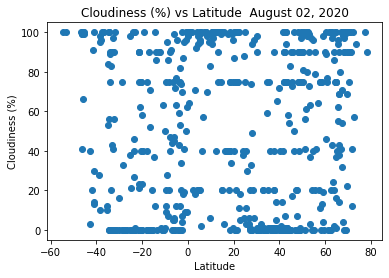

In [107]:
title = "Cloudiness (%) vs Latitude"

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloudiness (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"{title}  {analysis_date}")

plt.savefig(f"../output_data/{title}.png")

## Latitude vs. Wind Speed Plot

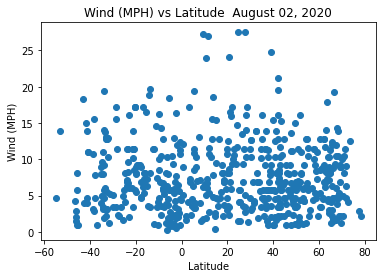

In [108]:
title = "Wind (MPH) vs Latitude"

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind (MPH)"])
plt.xlabel("Latitude")
plt.ylabel("Wind (MPH)")
plt.title(f"{title}  {analysis_date}")

plt.savefig(f"../output_data/{title}.png")

## Linear Regression

In [109]:
# OPTIONAL: Create a function to create Linear Regression plots

In [110]:
# Create Northern and Southern Hemisphere DataFrames
north_weather_data_df = clean_city_data_df[clean_city_data_df["Latitude"] >= 0]
south_weather_data_df = clean_city_data_df[clean_city_data_df["Latitude"] < 0]
north_weather_data_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Min Temperature (F),Max Temperature (F),Humidity (%),Cloudiness (%),Wind (MPH)
2,jamestown,US,42.10,-79.24,65.57,64.40,66.00,93.0,90.0,12.75
6,bauchi,NG,10.50,10.00,70.52,70.52,70.52,94.0,99.0,5.14
7,voyvozh,RU,62.89,54.96,50.68,50.68,50.68,98.0,100.0,8.34
12,altamont,US,42.21,-121.74,77.40,75.00,82.40,20.0,1.0,16.11
17,tasiilaq,GL,65.61,-37.64,48.20,48.20,48.20,66.0,96.0,2.24


In [111]:
# Declare the function and create the UDF
# LRS stands for Linear_Regression_Scatter
def plot_LRS_func(x_values: pd.Series, y_values: pd.Series, title, x_title, y_title, date) :
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
    plt.title(f"{title}  {date}")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    
    plt.savefig(f"../output_data/{title}.png")
    
    return

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

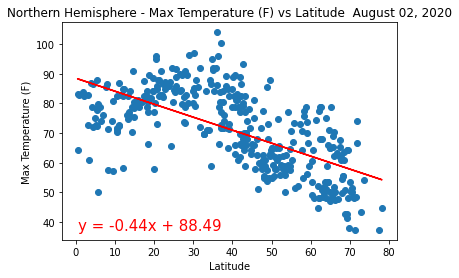

In [112]:
plot_LRS_func(north_weather_data_df["Latitude"], 
             north_weather_data_df["Max Temperature (F)"],
             "Northern Hemisphere - Max Temperature (F) vs Latitude",
             "Latitude",
             "Max Temperature (F)",
              analysis_date)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

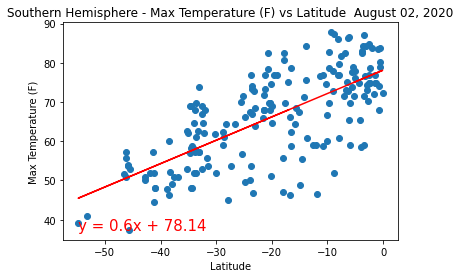

In [113]:
plot_LRS_func(south_weather_data_df["Latitude"], 
             south_weather_data_df["Max Temperature (F)"],
             "Southern Hemisphere - Max Temperature (F) vs Latitude",
             "Latitude",
             "Max Temperature (F)",
              analysis_date)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

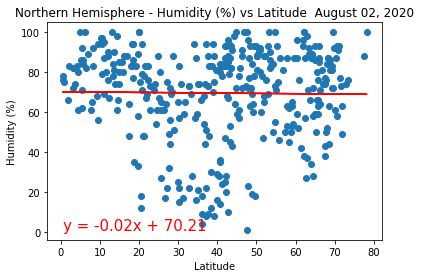

In [114]:
plot_LRS_func(north_weather_data_df["Latitude"], 
             north_weather_data_df["Humidity (%)"],
             "Northern Hemisphere - Humidity (%) vs Latitude",
             "Latitude",
             "Humidity (%)",
              analysis_date)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

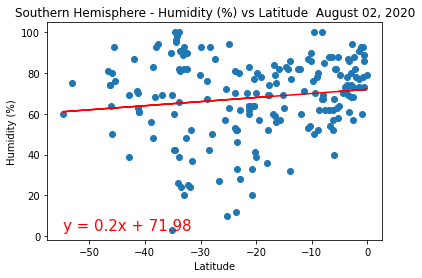

In [115]:
plot_LRS_func(south_weather_data_df["Latitude"], 
             south_weather_data_df["Humidity (%)"],
             "Southern Hemisphere - Humidity (%) vs Latitude",
             "Latitude",
             "Humidity (%)",
              analysis_date)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

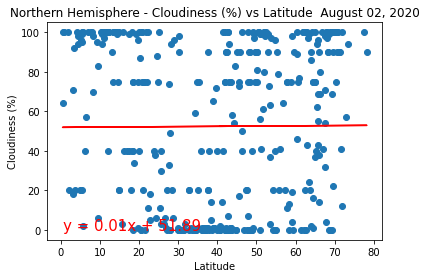

In [116]:
plot_LRS_func(north_weather_data_df["Latitude"], 
             north_weather_data_df["Cloudiness (%)"],
             "Northern Hemisphere - Cloudiness (%) vs Latitude",
             "Latitude",
             "Cloudiness (%)",
              analysis_date)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

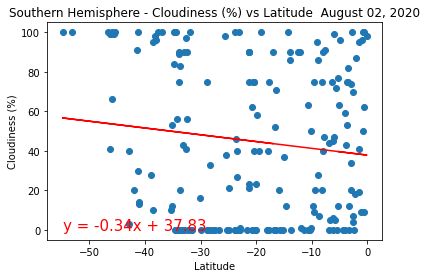

In [117]:
plot_LRS_func(south_weather_data_df["Latitude"], 
             south_weather_data_df["Cloudiness (%)"],
             "Southern Hemisphere - Cloudiness (%) vs Latitude",
             "Latitude",
             "Cloudiness (%)",
              analysis_date)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

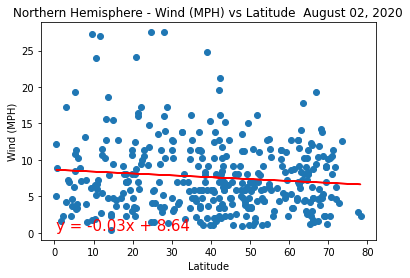

In [118]:
plot_LRS_func(north_weather_data_df["Latitude"], 
             north_weather_data_df["Wind (MPH)"],
             "Northern Hemisphere - Wind (MPH) vs Latitude",
             "Latitude",
             "Wind (MPH)",
              analysis_date)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

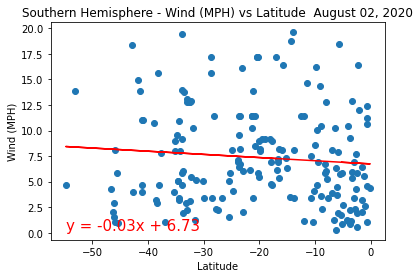

In [119]:
plot_LRS_func(south_weather_data_df["Latitude"], 
             south_weather_data_df["Wind (MPH)"],
             "Southern Hemisphere - Wind (MPH) vs Latitude",
             "Latitude",
             "Wind (MPH)",
              analysis_date)

In [ ]:
# Trends and observations:

# I've noticed that the further South from the equator one measures the temperature the colder it generally becomes.
# The same can also be said for measuring further and further North of the equator

# There appears to no correlation with the latitude of a locality and the humidity, wind speed, and cloudiness

# However, I did notice that there are grouping of cloudiness. Specifically around 100% and 0%. There are also 
# groupings around 90%, 75%, 40%, and 20%. This is probably due to human simplification.